<a href="https://colab.research.google.com/github/ArinaLazarenko/emotions_detection/blob/main/text_emotion_recognition_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model loading

In [1]:
!pip install transformers torch datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from datasets import load_dataset
from sklearn.metrics import accuracy_score, classification_report

In [3]:
tokenizer = AutoTokenizer.from_pretrained('bhadresh-savani/roberta-base-emotion')
model = AutoModelForSequenceClassification.from_pretrained('bhadresh-savani/roberta-base-emotion')

emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/983 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [4]:
text = "I'm so happy to see you!" # Example text

inputs = tokenizer(text, return_tensors='pt')
# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

predicted_class = torch.argmax(outputs.logits, dim=1).item()

In [5]:
predicted_emotion = emotion_labels[predicted_class]
print(f"Predicted emotion: {predicted_emotion}")

Predicted emotion: joy


Test dataset :

In [6]:
dataset = load_dataset('emotion', split='test')
true_labels = []
predicted_labels = []

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [7]:
# Iterate over the dataset
for example in dataset:
    inputs = tokenizer(example['text'], return_tensors='pt')

    with torch.no_grad():
        outputs = model(**inputs)

    predicted_class = torch.argmax(outputs.logits, dim=1).item()

    # Append the true and predicted labels
    true_labels.append(example['label'])
    predicted_labels.append(predicted_class)

In [8]:
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [9]:
print(classification_report(true_labels, predicted_labels, target_names=emotion_labels))

              precision    recall  f1-score   support

     sadness       0.98      0.95      0.97       581
         joy       0.96      0.94      0.95       695
        love       0.80      0.92      0.86       159
       anger       0.91      0.93      0.92       275
        fear       0.84      0.96      0.90       224
    surprise       1.00      0.53      0.69        66

    accuracy                           0.93      2000
   macro avg       0.92      0.87      0.88      2000
weighted avg       0.94      0.93      0.93      2000



Validation dataset

In [10]:
dataset = load_dataset('emotion', split='validation')
true_labels = []
predicted_labels = []

In [11]:
# Iterate over the dataset
for example in dataset:
    inputs = tokenizer(example['text'], return_tensors='pt')

    with torch.no_grad():
        outputs = model(**inputs)

    predicted_class = torch.argmax(outputs.logits, dim=1).item()

    # Append the true and predicted labels
    true_labels.append(example['label'])
    predicted_labels.append(predicted_class)

In [12]:
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [13]:
print(classification_report(true_labels, predicted_labels, target_names=emotion_labels))

              precision    recall  f1-score   support

     sadness       0.98      0.94      0.96       550
         joy       0.97      0.95      0.96       704
        love       0.83      0.93      0.88       178
       anger       0.92      0.96      0.94       275
        fear       0.85      0.97      0.91       212
    surprise       1.00      0.73      0.84        81

    accuracy                           0.94      2000
   macro avg       0.93      0.91      0.91      2000
weighted avg       0.94      0.94      0.94      2000



# Vizualization

In [14]:
!pip install scikit-learn

In [15]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [16]:
tokenizer = AutoTokenizer.from_pretrained('bhadresh-savani/roberta-base-emotion')
model = AutoModelForSequenceClassification.from_pretrained('bhadresh-savani/roberta-base-emotion')

emotion_labels = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [17]:
model.config.output_hidden_states = True

In [18]:
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    outputs = model(**inputs)
    hidden_states = outputs.hidden_states
    cls_embedding = hidden_states[-1][:, 0, :]
    return cls_embedding.detach().numpy()

In [19]:
def classify_text(text):
    try:
        inputs = tokenizer(
            text,
            return_tensors="pt",
            truncation=True,
            padding=True,
            max_length=512
        )

        model.eval()

        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits

        probabilities = torch.softmax(logits, dim=1).squeeze().tolist()

        predicted_class_idx = np.argmax(probabilities)

        predicted_emotion = emotion_labels[predicted_class_idx]
        return predicted_emotion
    except Exception as e:
        print(f"Error during classification: {e}")
        return None

In [20]:
label_to_color = {
        'anger': 'black',
        'fear': 'purple',
        'sadness': 'blue',
        'surprise': 'green',
        'joy': 'orange',
        'love': 'red'
    }



---



In [21]:
dataset = load_dataset('emotion', split='test')
texts = dataset['text']

In [22]:
embeddings = [get_bert_embedding(text) for text in texts]

In [23]:
embeddings = np.vstack(embeddings) # Convert list of embeddings to a numpy array

In [24]:
labels = []
for text in texts:
    emotion = classify_text(text)
    labels.append(emotion)

In [25]:
colors = [label_to_color[label] for label in labels]
print(colors)

['blue', 'blue', 'blue', 'orange', 'blue', 'purple', 'black', 'orange', 'orange', 'black', 'black', 'blue', 'purple', 'orange', 'red', 'blue', 'orange', 'blue', 'black', 'orange', 'blue', 'orange', 'orange', 'blue', 'blue', 'purple', 'black', 'blue', 'purple', 'black', 'purple', 'black', 'blue', 'black', 'blue', 'orange', 'orange', 'blue', 'orange', 'orange', 'black', 'blue', 'orange', 'blue', 'orange', 'black', 'orange', 'orange', 'purple', 'purple', 'blue', 'purple', 'orange', 'blue', 'orange', 'blue', 'blue', 'orange', 'blue', 'black', 'blue', 'blue', 'orange', 'orange', 'blue', 'green', 'blue', 'black', 'purple', 'green', 'orange', 'red', 'purple', 'orange', 'red', 'black', 'orange', 'blue', 'orange', 'red', 'orange', 'black', 'blue', 'orange', 'blue', 'blue', 'orange', 'orange', 'orange', 'blue', 'orange', 'purple', 'black', 'purple', 'black', 'black', 'red', 'blue', 'purple', 'blue', 'blue', 'blue', 'blue', 'black', 'black', 'black', 'orange', 'orange', 'purple', 'blue', 'orange'

2d vizualization

In [26]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)
print("PCA result shape:", pca_result.shape)

PCA result shape: (2000, 2)


In [27]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

Explained variance ratio: [0.38654625 0.22888044]


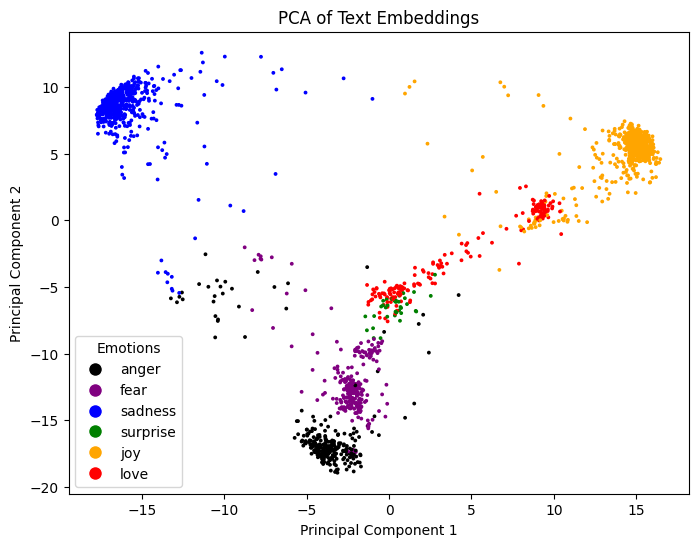

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, s=3)
plt.title('PCA of Text Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
            for color in label_to_color.values()]
plt.legend(handles=handles, labels=label_to_color, title="Emotions")
plt.show()

3d vizualization

In [29]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(embeddings)
print("PCA result shape:", pca_result.shape)

PCA result shape: (2000, 3)


In [30]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

Explained variance ratio: [0.38654625 0.22888036 0.13040161]


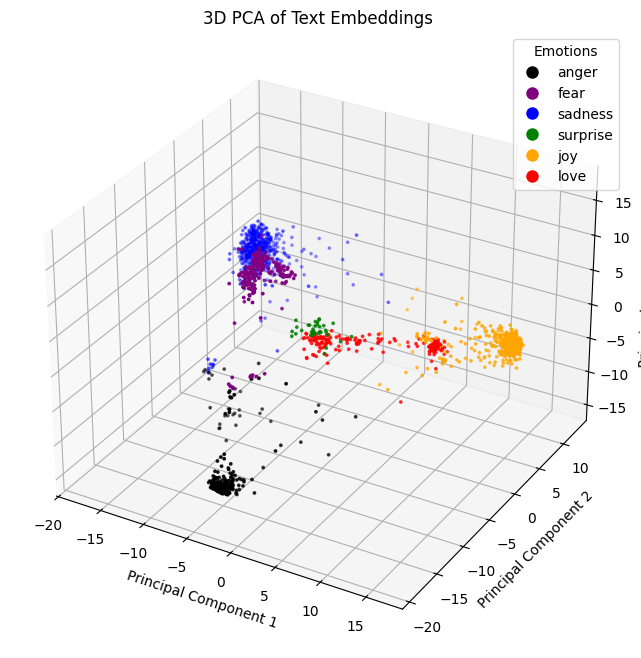

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=colors, s=3)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Text Embeddings')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
            for color in label_to_color.values()]
plt.legend(handles=handles, labels=label_to_color, title="Emotions")
plt.show()



---





---



In [ ]:
print(f"Input text: {texts}")
print(f"Tokenized input: {tokenizer(texts)}")

Input text: ['I love you']
Tokenized input: {'input_ids': [[0, 100, 657, 47, 2]], 'attention_mask': [[1, 1, 1, 1, 1]]}


In [ ]:
raw_output = model(**inputs)
print(f"Input text: {raw_output}")

Input text: SequenceClassifierOutput(loss=None, logits=tensor([[-1.6521,  6.5970, -1.1295, -1.3106, -1.5478, -1.7220]],
       grad_fn=<AddmmBackward0>), hidden_states=(tensor([[[ 1.6761e-01, -5.5750e-02, -2.9887e-04,  ..., -8.2365e-02,
           8.3414e-02,  1.3496e-02],
         [-5.0345e-02,  3.0491e-01,  2.2875e-01,  ...,  7.6970e-02,
          -1.5089e-01,  2.3354e-01],
         [-1.1335e-01,  4.3666e-01, -2.4443e-03,  ..., -7.0408e-02,
          -1.7028e-01,  2.6039e-01],
         ...,
         [ 2.4656e-01, -1.1644e-01,  3.9356e-03,  ...,  3.2202e-01,
          -1.6282e-01, -1.6775e-02],
         [ 8.4902e-02, -2.6547e-01,  2.9254e-01,  ..., -3.4476e-01,
           1.3607e-01, -2.7115e-02],
         [ 7.2399e-02,  6.9478e-03,  1.4297e-01,  ...,  3.6585e-01,
           9.3103e-02,  2.8957e-02]]], grad_fn=<NativeLayerNormBackward0>), tensor([[[-0.0454,  0.0053,  0.0324,  ..., -0.0036,  0.0040, -0.1605],
         [-0.2527,  0.0091,  0.9458,  ...,  0.0722, -0.3124,  0.2440],
      

In [ ]:
# Add this line before running the model inference
model.config.output_hidden_states = True

# Then, you can access the hidden states after inference
raw_output = model(**inputs)
embeddings = raw_output.hidden_states[-1].mean(dim=1)  # Get embeddings from the last hidden state
print(f"Input text: {embeddings}")

Input text: tensor([[-1.4328e+00,  7.0456e-01, -1.5217e-01,  9.2783e-01,  1.6637e-01,
          5.5207e-01,  5.0749e-01, -6.5623e-01,  1.4694e+00, -1.1806e+00,
          4.9338e-01, -1.1129e+00, -8.2780e-01,  3.8889e-01, -4.6677e-01,
          8.6490e-01,  5.3108e-01, -7.8686e-01, -6.4194e-01, -1.0950e+00,
         -8.9856e-01, -1.6199e+00,  1.9947e-01, -1.2721e-01,  1.0713e+00,
          3.4078e-01, -4.4640e-01,  4.4375e-01, -7.7805e-01, -8.8560e-01,
         -4.1992e-01, -1.3248e-01, -9.1046e-01,  4.9158e-01, -8.4074e-01,
         -5.1834e-02,  9.7520e-01,  2.2787e-01, -1.2404e+00,  1.0619e-01,
          5.7527e-01, -1.1038e+00,  1.4573e+00,  1.7181e+00,  5.8549e-01,
         -9.2672e-01,  1.3518e+00,  3.2916e-01, -9.1143e-01,  3.4648e-01,
         -2.3781e-01, -1.5461e+00, -1.6774e+00,  1.1867e+00,  3.1203e-01,
          5.4652e-01,  1.1500e+00,  1.8831e-01, -1.4224e+00,  2.3311e-01,
         -2.5193e-01,  2.0114e+00, -9.4890e-01,  4.7114e-01, -2.0167e-01,
          1.1593e+00,  1.2



---



In [ ]:
texts = ['I am happy', 'I am sad', 'I love you', 'I hate you', 'I am afraid', 'I am surprized', 'Something new']

In [ ]:
embeddings = [get_bert_embedding(text) for text in texts]

In [ ]:
print(embeddings)

[array([[-1.28559673e+00,  6.17594957e-01, -2.81139929e-02,
         1.04202902e+00,  1.04868114e+00,  8.76909643e-02,
         2.34283954e-01, -3.52840632e-01,  1.13264036e+00,
        -1.11669970e+00,  5.14527082e-01, -9.15322781e-01,
        -7.60106683e-01,  6.42229736e-01, -2.57963121e-01,
         1.25246036e+00,  1.51881576e-02, -4.55818355e-01,
        -2.42759243e-01, -1.25042546e+00, -3.55044484e-01,
        -1.18738472e+00,  2.59572417e-01, -9.12235864e-03,
         1.05660295e+00,  1.10206142e-01, -3.69301558e-01,
         7.82012105e-01, -7.59046555e-01, -8.17512929e-01,
        -8.53221834e-01, -4.44869734e-02, -8.44885468e-01,
         3.69848847e-01, -1.25280774e+00,  2.47717962e-01,
         8.26645613e-01,  1.78504944e-01, -1.20953441e+00,
         8.56871605e-02,  2.88866013e-01, -1.17876649e+00,
         1.95721960e+00,  1.20392227e+00,  7.63521075e-01,
        -5.25859952e-01,  1.17989278e+00,  8.89701426e-01,
        -5.87703586e-01,  1.36572883e-01, -3.76555830e-

In [ ]:
embeddings = np.vstack(embeddings) # Convert list of embeddings to a numpy array

In [ ]:
print(embeddings)

[[-1.2855967   0.61759496 -0.02811399 ...  0.04288066 -0.24109295
   0.6666866 ]
 [-0.1366531  -0.6097927  -0.16965395 ... -1.537064   -0.9199229
   0.7927224 ]
 [-0.93194044 -0.05961747 -0.3297364  ... -1.5186813  -0.21690214
   1.2966342 ]
 [ 0.6068756   0.10537225  0.05562374 ... -0.46884233 -1.0860674
  -0.18723683]
 [ 0.4103605  -0.9736419   0.24607503 ...  1.8274034   0.0684521
   0.33383882]
 [-0.93263346  0.47429556  0.39880043 ... -0.4208949  -0.03216339
   1.1052673 ]]


In [ ]:
labels = []
for text in texts:
    emotion = classify_text(text)
    labels.append(emotion)

In [ ]:
print(labels)

['joy', 'sadness', 'love', 'anger', 'fear', 'joy', 'joy']


In [ ]:
colors = [label_to_color[label] for label in labels]
print(colors)

['orange', 'blue', 'red', 'black', 'purple', 'orange', 'orange']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
embeddings_standardized = scaler.fit_transform(embeddings)

In [ ]:
print("Shape of embeddings_standardized:", embeddings_standardized.shape)


Shape of embeddings_standardized: (7, 768)


In [ ]:
print("Embeddings summary:\n", np.mean(embeddings_standardized, axis=0), np.std(embeddings_standardized, axis=0))

Embeddings summary:
 [ 2.9802322e-08 -9.9341078e-09  1.9868216e-08 -2.7318796e-08
  1.9868216e-08  9.9341078e-09  3.9736431e-08 -4.9670536e-08
 -1.9868216e-08  9.9341078e-09 -1.2417635e-09  4.9670539e-09
  0.0000000e+00 -4.9670539e-09  0.0000000e+00  1.9868216e-08
  1.9868216e-08 -4.9670539e-09 -1.1175871e-08 -1.9868216e-08
  9.9341078e-09  1.9868216e-08 -3.9736431e-08  9.9341078e-09
  3.4769375e-08 -1.2417635e-09 -3.7252903e-08  3.9736431e-08
  9.9341078e-09 -4.9670539e-09 -9.9341078e-09  2.4835268e-08
 -2.4835268e-08 -2.9802322e-08  0.0000000e+00  1.1175871e-08
  1.4901161e-08 -1.4901161e-08  1.9868216e-08 -3.9736431e-08
 -2.7318796e-08 -1.9868216e-08  0.0000000e+00  0.0000000e+00
 -1.9868216e-08 -1.9868216e-08  1.9868216e-08  0.0000000e+00
  0.0000000e+00  9.9341078e-09 -1.1175871e-08  0.0000000e+00
 -9.9341078e-09  1.9868216e-08  0.0000000e+00  6.2088170e-09
  0.0000000e+00 -1.9868216e-08  0.0000000e+00 -9.9341078e-09
 -1.4901161e-08  0.0000000e+00  3.9736431e-08 -4.9670539e-09
 -2

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings_standardized)
print("PCA result shape:", pca_result.shape)

PCA result shape: (7, 2)


In [ ]:
print(pca_result)

[[-17.334211    7.371328 ]
 [ 12.62304   -21.448915 ]
 [-12.837239  -13.472233 ]
 [ 15.744446   -7.938662 ]
 [ 20.597599   22.841496 ]
 [-15.720538    6.407985 ]
 [ -3.0730913   6.238986 ]]


In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

Explained variance ratio: [0.2889394  0.25309473]


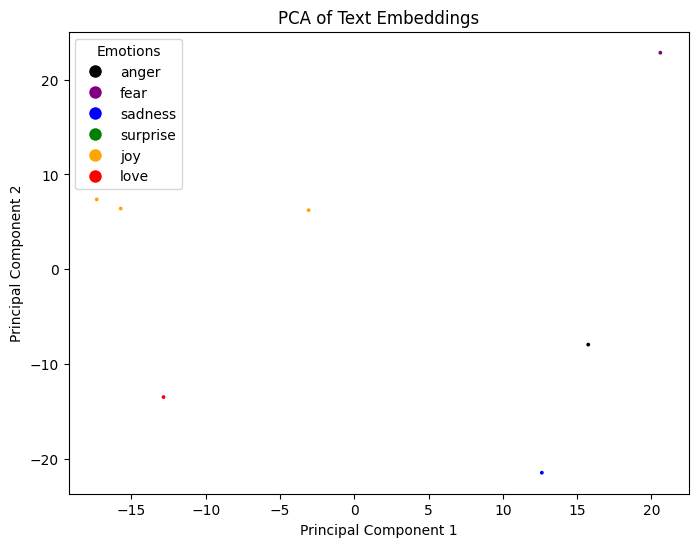

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, s=3)
plt.title('PCA of Text Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
            for color in label_to_color.values()]
plt.legend(handles=handles, labels=label_to_color, title="Emotions")
plt.show()



---

